## Plotting with Histogram

In [5]:
import pandas as pd
import pymc3 as pm
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
df1 = pd.read_csv('../data/2014.12.5 OneEigth Graphite', header=None , names = ['Time', 'Temp'],  delimiter = '\t')
df2 = pd.read_csv('../data/2014.12.8 OneFourth Graphite', header=None , names = ['Time', 'Temp'],  delimiter = '\t')
df3 = pd.read_csv('../data/2014.12.5 OneHalf Graphite', header=None , names = ['Time', 'Temp'],  delimiter = '\t')
df4 = pd.read_csv('../data/2014.12.8 ThreeFourths Graphite', header=None , names = ['Time', 'Temp'],  delimiter = '\t')
df5 = pd.read_csv('../data/2014.12.8 One Graphite', header=None , names = ['Time', 'Temp'],  delimiter = '\t')

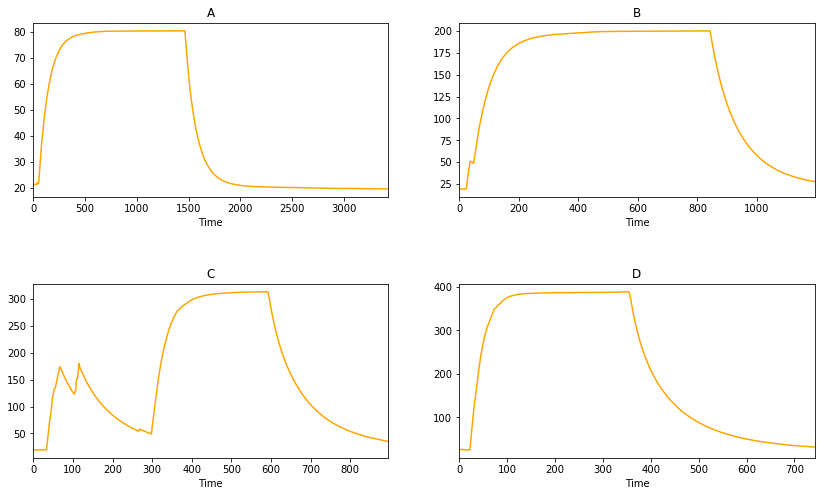

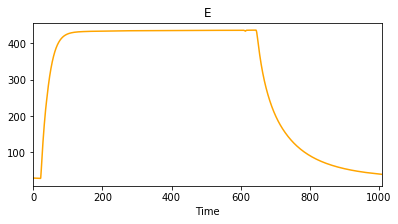

In [75]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))
fig.subplots_adjust(hspace=.5)
df1.plot(x = 'Time', y = 'Temp', color = 'orange', legend = False, ax=axes[0,0]); axes[0,0].set_title('A')
df2.plot(x = 'Time', y = 'Temp', color = 'orange', legend = False, ax=axes[0,1]); axes[0,1].set_title('B')
df3.plot(x = 'Time', y = 'Temp', color = 'orange', legend = False, ax=axes[1,0]); axes[1,0].set_title('C')
df4.plot(x = 'Time', y = 'Temp', color = 'orange', legend = False, ax=axes[1,1]); axes[1,1].set_title('D');
df5.plot(x = 'Time', y = 'Temp', color = 'orange', legend = False, title = 'E', figsize=(6.25, 3));


In [76]:
#isolating the thermal decay curve with a time condition from above and removing noisy measurements near room temperature. 
df1 = df1[ (df1.Time > 1000) & (df1.Temp < 70) & (df1.Temp > 50)]
df2 = df2[ (df2.Time > 800)  & (df2.Temp < 175) & (df2.Temp > 50)]
df3 = df3[ (df3.Time > 500) & (df3.Temp < 250) & (df3.Temp > 50)]
df4 = df4[ (df4.Time > 300)  & (df4.Temp < 350) & (df4.Temp > 50)]
df5 = df5[ (df5.Time > 600)  & (df5.Temp < 400) & (df5.Temp > 50)]



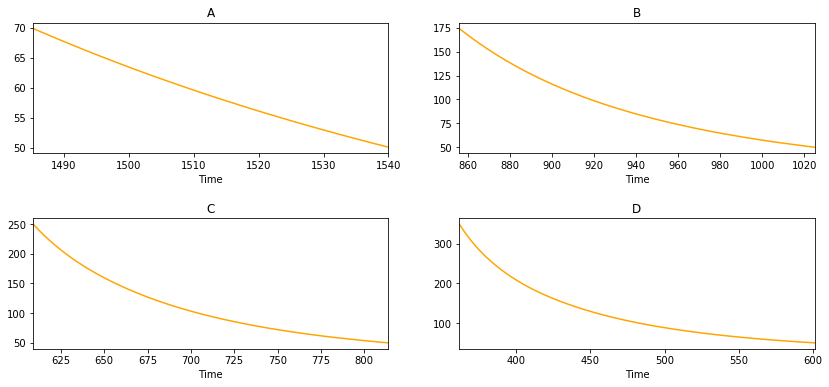

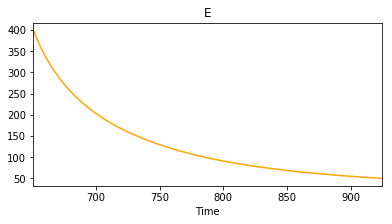

In [77]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 6))
fig.subplots_adjust(hspace=.5)
df1.plot(x = 'Time', y = 'Temp', color = 'orange', legend = False, ax=axes[0,0]); axes[0,0].set_title('A')
df2.plot(x = 'Time', y = 'Temp', color = 'orange', legend = False, ax=axes[0,1]); axes[0,1].set_title('B')
df3.plot(x = 'Time', y = 'Temp', color = 'orange', legend = False, ax=axes[1,0]); axes[1,0].set_title('C')
df4.plot(x = 'Time', y = 'Temp', color = 'orange', legend = False, ax=axes[1,1]); axes[1,1].set_title('D');
df5.plot(x = 'Time', y = 'Temp', color = 'orange', legend = False, title = 'E', figsize=(6.25, 3));

In [78]:
#Establish constants and solve for emmisivity 

def em_column(df):
    #Constants: sigma [J/(m^2*s*K^4)]; m, mass in kilograms; T0 in K; A, area in m^2
    a = 0.00080802
    T0 = 19 + 273.15
    sigma = 5.670373e-08  
    m = 0.0007076 
    
      #Converts Celcius to Kelvin
    df['TempK'] = df['Temp'] + 273.15 
    
    #heat capacity for silicon as a function of temperature. Constants from Endo, 2003. 
    c = lambda x: 1 / ( 11.07*x**(-1.644) + 0.0003688*x**(0.02191) )
    
    #Gives 'em'  column correct length
    df[ 'em' ] = np.nan
    
    #Reset the index for easy iteration 
    df.reset_index(inplace = True, drop = True)
    
    #iterate through columns and solve for emissivity 
    for i in range(2, len(df)):
        numerator = -m*c( df.TempK[ i ] )*( df.TempK[ i ] - df.TempK[ i - 2 ] )
        denominator =  ( df.Time[ i ] - df.Time[ i - 2] )*a*sigma*(df.TempK[ i -2]**4 - T0**4  )
        df['em'][i] =  numerator / denominator
        
    #Make temperature ascending 
    df.sort_values(['Temp'], ascending=True, inplace =True)
    #Reset the index for easy data cleaning 
    df.reset_index(inplace = True, drop = True)

In [79]:
#Solve emissivity for all data sets 
em_column(df1)
em_column(df2)
em_column(df3)
em_column(df4)
em_column(df5)

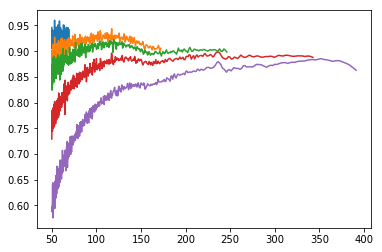

In [83]:
#Plot all emissivities 
plt.plot( df1.Temp, df1.em ,df2.Temp, df2.em, df3.Temp, df3.em, df4.Temp, df4.em, df5.Temp, df5.em )
plt.show()

In [82]:
df1

,Time,Temp,TempK,em
0,1540.002,50.078,323.228,0.945979
1,1539.465,50.224,323.374,0.938275
2,1538.929,50.379,323.529,0.904893
3,1538.392,50.524,323.674,0.912796
4,1537.855,50.670,323.820,0.933637
5,1537.318,50.819,323.969,0.941202
6,1536.782,50.973,324.123,0.917510
7,1536.245,51.126,324.276,0.925807
8,1535.708,51.274,324.424,0.933322
9,1535.172,51.431,324.581,0.918826
